## Audio Processing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import stft, fftconvolve, find_peaks
from scipy.io.wavfile import read

In [2]:
# import file
filename = 'data/audio.wav'

In [3]:
sr, data = read(filename, mmap=False)

In [4]:
data.shape

(123480, 2)

In [5]:
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / sr
print(f"length = {length}s")

number of channels = 2
length = 2.8s


## Waveform

In [6]:
time = np.linspace(0., length, data.shape[0])

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


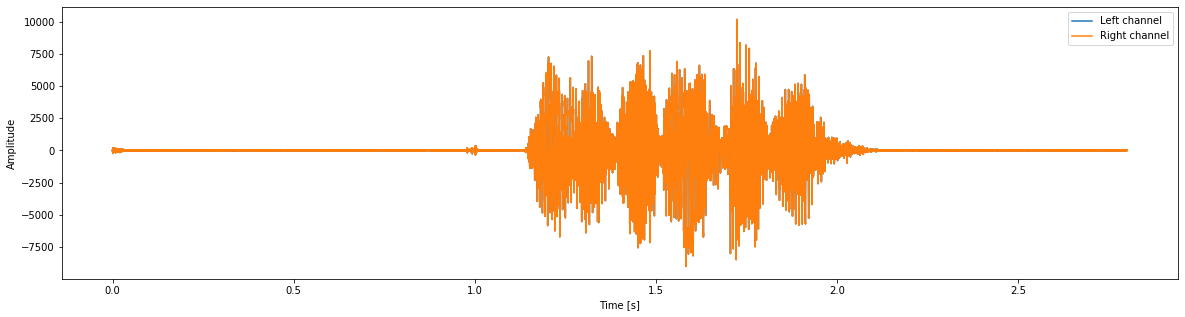

In [7]:
plt.figure(figsize=(20,5))
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [8]:
left_data = data[:,0]

## FFT

In [9]:
fft = np.fft.fft(left_data)
magnitude = abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

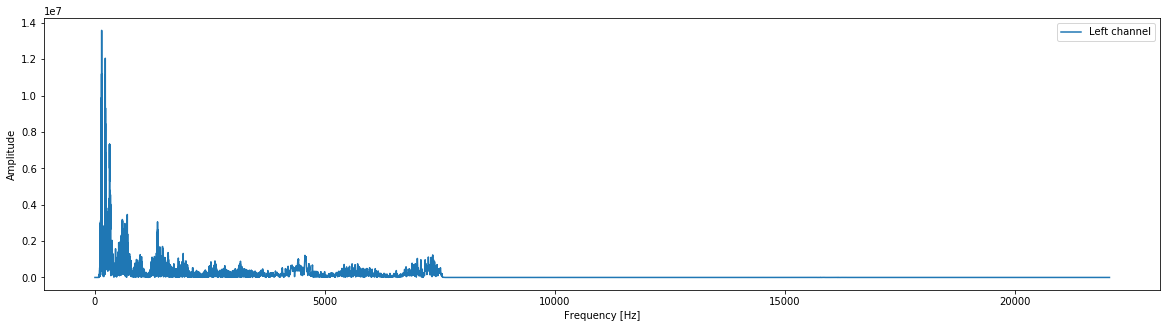

In [10]:
plt.figure(figsize=(20,5))
plt.plot(frequency[:int(len(magnitude)/2)], magnitude[:int(len(magnitude)/2)], label="Left channel")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

## Spectrogram

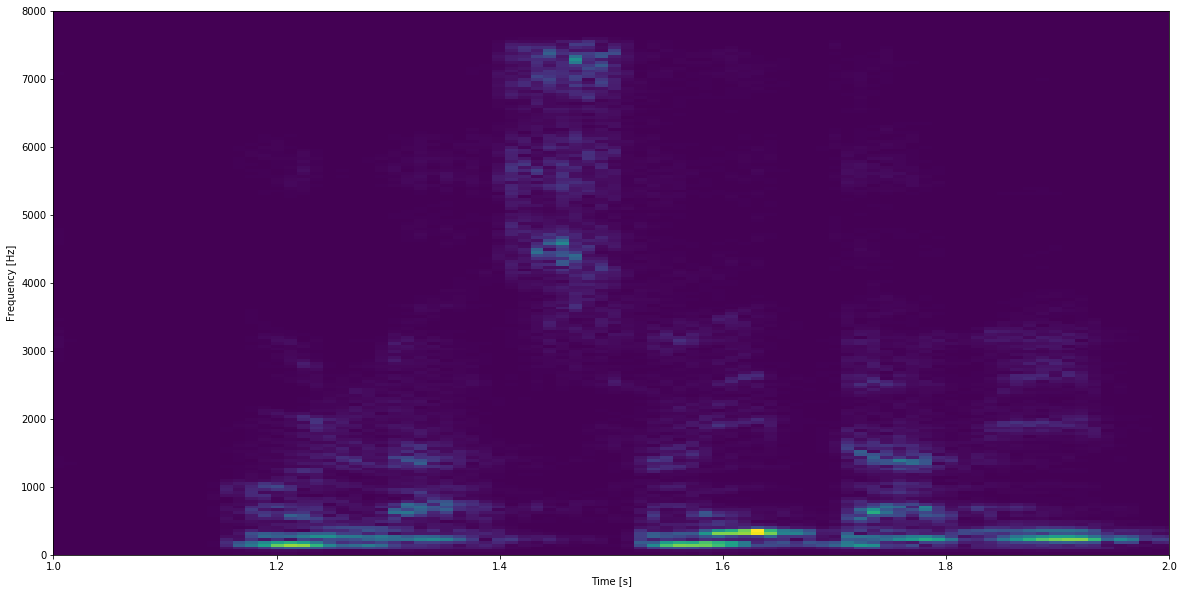

In [12]:
f, t, Zxx = stft(left_data, fs=sr, window='hann', nperseg=256*4, noverlap=None)
plt.figure(figsize=(20,10))
plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis')
plt.ylim(0,8000)
plt.xlim(1,2)
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

## Summary

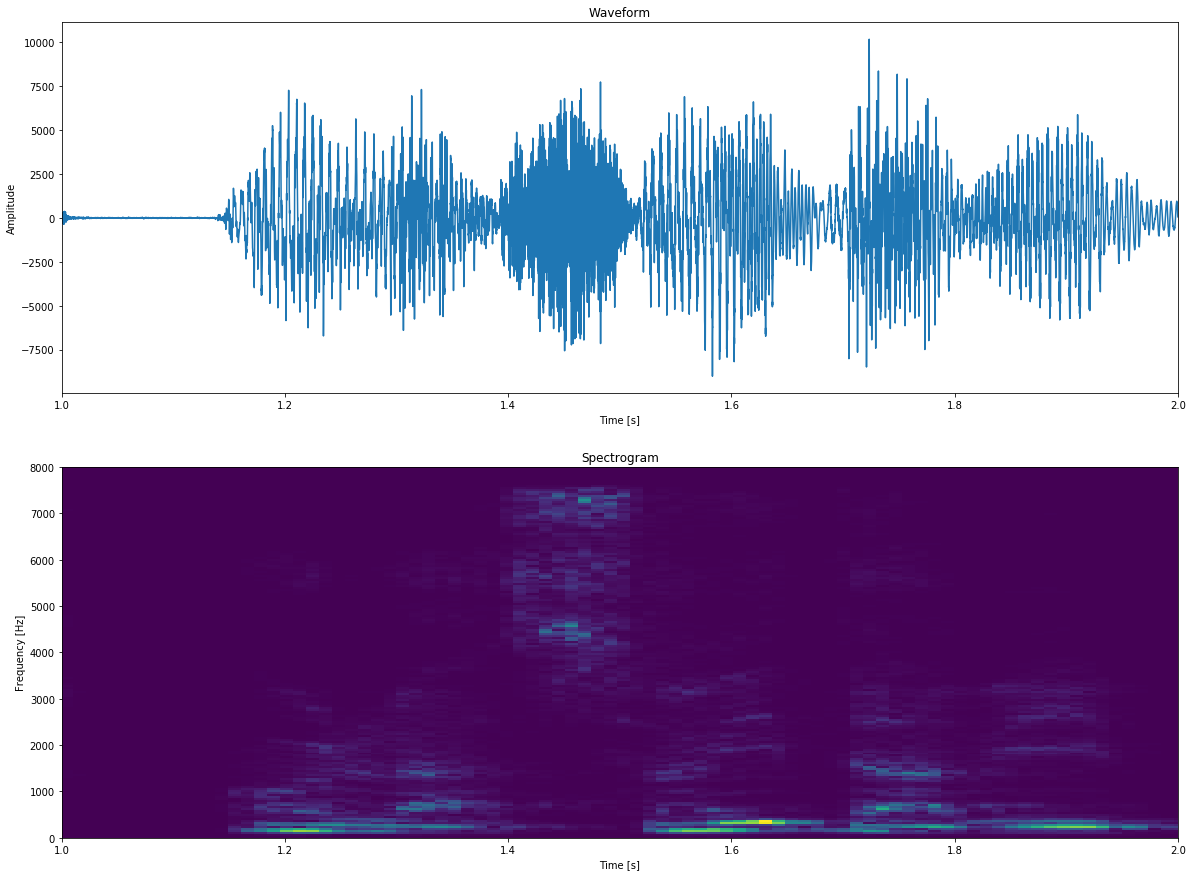

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))

#ax1.figure(figsize=(20,5))
ax1.plot(time, left_data)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
ax1.set_title('Waveform')
ax1.set_xlim(1,2)

ax2.pcolormesh(t, f, np.abs(Zxx), cmap='viridis')
ax2.set_ylim(0,8000)
ax2.set_xlim(1,2)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Frequency [Hz]")
ax2.set_title('Spectrogram')

plt.show()


## Tone & Timbre

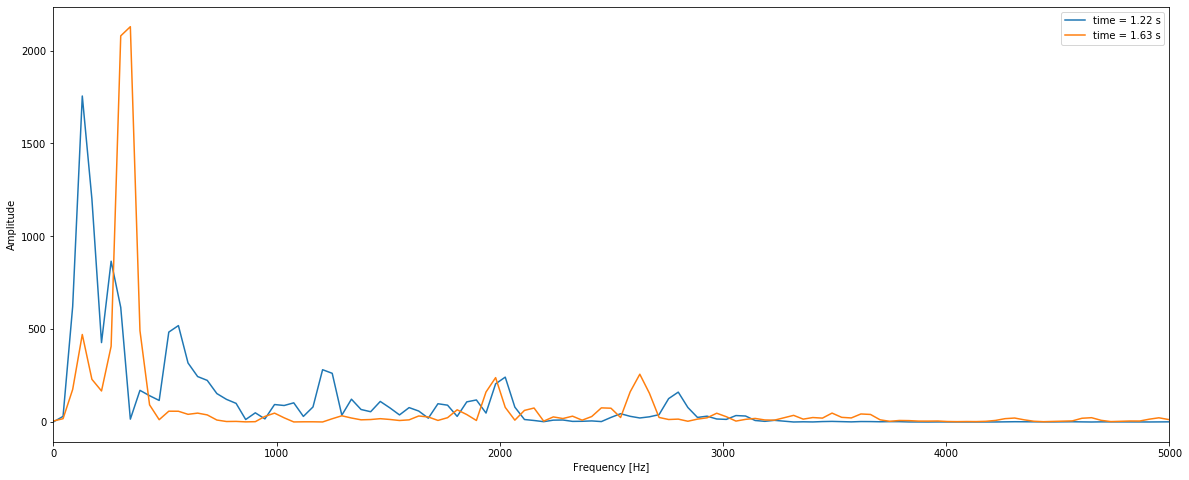

In [14]:
# Amplitude vs Frequency for two particular instants

stft = np.abs(Zxx)

plt.figure(figsize=(20,8))
plt.plot(f,stft[:,105], label="time = "+str(round(t[105],2))+" s")
plt.plot(f,stft[:,140], label="time = "+str(round(t[140],2))+" s")
plt.xlim(0,5000)
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

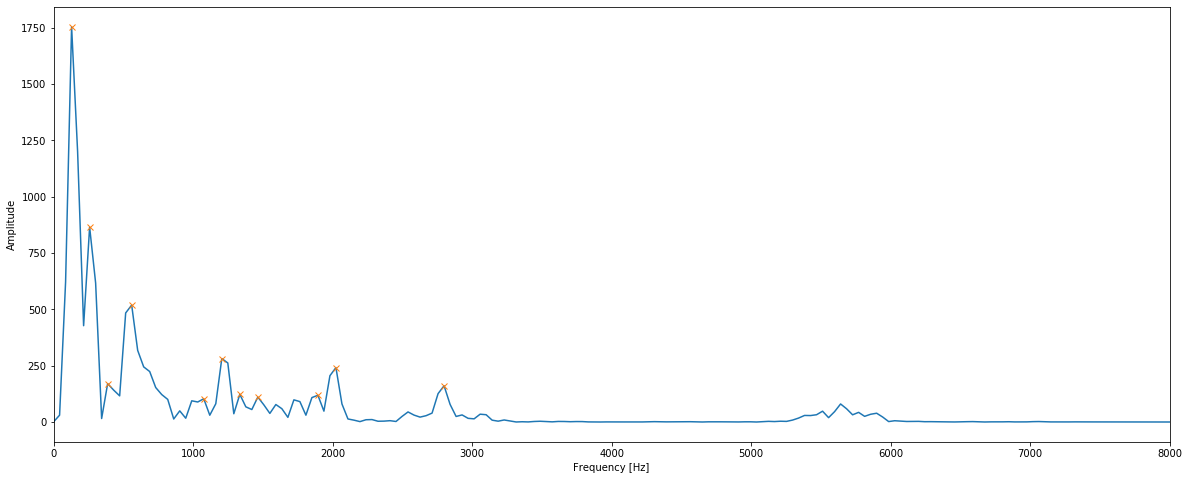

In [39]:
# Peaks for a particular instant

x = stft[:,105]
peaks, _ = find_peaks(x, height=100)
plt.figure(figsize=(20,8))
plt.plot(f, x)
plt.plot(f[peaks], x[peaks], "x")
plt.xlim(0,8000)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

In [16]:
peaks = []
times = []
for i in range(stft.shape[1]):
    x = stft[:,i]
    i_peaks, _ = find_peaks(x, height=300)#220)
    if (i_peaks.size != 0) and (i_peaks[0]<=70):
        peaks.append(i_peaks)
        times.append(i)           

In [17]:
peak_1 = []
peak_2 = []
peak_3 = []
peak_4 = []

for i in range(len(peaks)):
    peak_1.append(peaks[i][0])
    try:
        peak_2.append(peaks[i][1])
        try:
            peak_3.append(peaks[i][2])
            try:
                peak_4.append(peaks[i][3])
            except:
                _
        except:
            _
    except:
        _

# First three frequencies:
f1 = f[int(np.median(peak_1))]
f2 = f[int(np.median(peak_2))]
f3 = f[int(np.median(peak_3))]

print(f"f1={round(f1,2)}Hz, f2={round(f2,2)}Hz, f3={round(f3,2)}Hz")


# First three amplitudes:
a1 = np.median(stft[times,int(np.median(peak_1))])
a2 = np.median(stft[times,int(np.median(peak_2))])
a3 = np.median(stft[times,int(np.median(peak_3))])



f1=129.2Hz, f2=301.46Hz, f3=559.86Hz


In [18]:
# Ratio between frequencies:
f2f1, f3f2 = f2/f1, (f3-f1)/(f2-f1)

# Ratio between amplitudes 1 and 2:
a1a2 = a1/a2

In [37]:
# Energy of first two harmonics
E1 = np.median(np.square(np.abs(Zxx[times,int(np.median(peak_1))])))
E2 = np.median(np.square(np.abs(Zxx[times,int(np.median(peak_2))])))

## Summary

In [38]:
print(f"First frequency: {round(f1,2)}Hz")
print(f"Ratio between frequencies: {round(f2f1,2)}, {f3f2}")

First frequency: 129.2Hz
Ratio between frequencies: 2.33, 2.5
